<a href="https://colab.research.google.com/github/mahhhdy/SBU_DataMining_Python/blob/main/SVM_Hard_margin_and_Soft_margin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# initial lib and chack for missing value 

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from google.colab import drive

import missingno as msno  # check missing value

drive.mount('/content/drive')
path='/content/drive/MyDrive/DataSets/phone price prediction train.csv'

df=pd.read_csv(path)
print(df.shape)
df.columns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2000, 21)


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Hard margin and Soft margin

In [194]:
data = pd.DataFrame(data=df, columns=['battery_power','ram'])
data['price_range']=df['price_range']
data.head()

,battery_power,ram,price_range
0,842,2549,1
1,1021,2631,2
2,563,2603,2
3,615,2769,2
4,1821,1411,1


In [195]:
data.price_range.replace({
    1:0,
    2:3
},inplace=True)

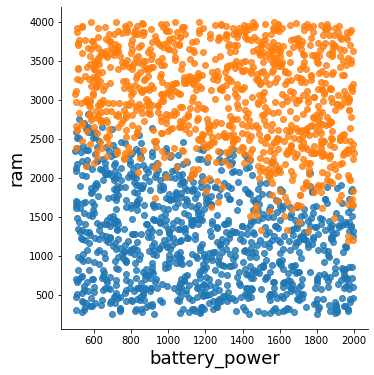

In [196]:
sns.lmplot(x='battery_power',y='ram',hue='price_range',data=data, fit_reg=False, legend=False)
# plt.legend(['Iris-Setosa','Iris-Versicolor'], fontsize = 14)
plt.xlabel('battery_power', fontsize = 18)
plt.ylabel('ram', fontsize = 18)
plt.show()

In [197]:
svc = LinearSVC(C=1000,loss="hinge")
svc.fit(data[['battery_power','ram']].values,data['price_range'].values)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

# feature engineering
binning the battery power feature with 3 unequal categories

In [198]:
df['battery_power'].describe()

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

In [199]:
def binningBetteryPower(battery_power):
  if battery_power<=1000:
    return 'cat1'
  elif (battery_power>1000) & (battery_power<=1500):
    return 'cat2'
  elif (battery_power>1500):
    return 'cat3'

In [200]:
df['binning_bettery_power'] = df['battery_power'].apply(binningBetteryPower)

binning battery_power feature to 3 categores

In [201]:
df['binning_bettery_power'].unique()

array(['cat1', 'cat2', 'cat3'], dtype=object)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   battery_power          2000 non-null   int64  
 1   blue                   2000 non-null   int64  
 2   clock_speed            2000 non-null   float64
 3   dual_sim               2000 non-null   int64  
 4   fc                     2000 non-null   int64  
 5   four_g                 2000 non-null   int64  
 6   int_memory             2000 non-null   int64  
 7   m_dep                  2000 non-null   float64
 8   mobile_wt              2000 non-null   int64  
 9   n_cores                2000 non-null   int64  
 10  pc                     2000 non-null   int64  
 11  px_height              2000 non-null   int64  
 12  px_width               2000 non-null   int64  
 13  ram                    2000 non-null   int64  
 14  sc_h                   2000 non-null   int64  
 15  sc_w

# one hot encoding
one hot encoding on categorical features

In [203]:
y = pd.get_dummies(df.binning_bettery_power)
print(y.head(15))

    cat1  cat2  cat3
0      1     0     0
1      0     1     0
2      1     0     0
3      1     0     0
4      0     0     1
5      0     0     1
6      0     0     1
7      0     0     1
8      0     1     0
9      1     0     0
10     1     0     0
11     0     0     1
12     0     0     1
13     1     0     0
14     0     0     1


# Add one feature as px_space 
by multipication of px_width and px_height

In [204]:
df['px_space'] = df['px_height']*df['px_width']

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,binning_bettery_power,px_space
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,cat1,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,cat2,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,cat1,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,cat1,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,cat3,1464096


the extended feature as px_space added as the last column

# normal distribution test and log transformation

In [205]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,px_space
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000,9.052601e+05
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314,8.297625e+05
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000,2.632005e+05
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000,6.013590e+05
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000,1.359027e+06
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000,3.886306e+06


I check some feature and I got that they dont have nornal distribution 
you can see battery power distribution below

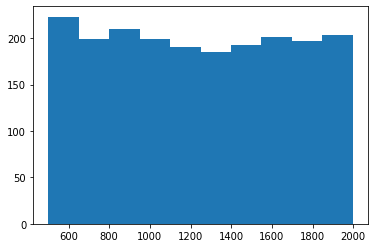

In [206]:
data = df.battery_power
plt.hist(data)
plt.show()

In [207]:
from numpy import mean
from numpy import std

data = df.battery_power
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=1238.518 stdv=439.308


I implement 3 transformation method 

In [208]:
df['battery_power_log'] = np.log(df['battery_power'])
df['battery_power_log2'] = np.log2(df['battery_power'])
df['battery_power_sqrt'] = np.sqrt(df['battery_power'])

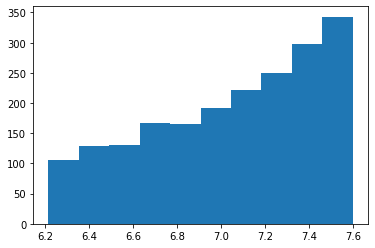

mean=7.051 stdv=0.390


In [209]:
data = df.battery_power_log

plt.hist(data)
plt.show()
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

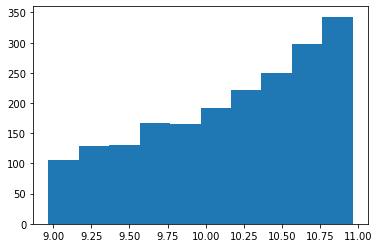

mean=10.172 stdv=0.562


In [210]:
data = df.battery_power_log2

plt.hist(data)
plt.show()
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

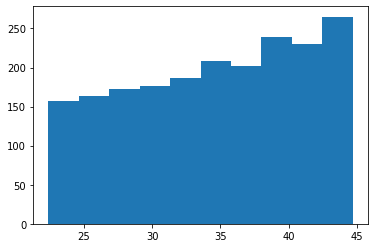

mean=34.598 stdv=6.442


In [211]:
data = df.battery_power_sqrt

plt.hist(data)
plt.show()
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

I test normal distributioan after impolement transformatioan methods and I see that transformation methods dosn`t change distributions

# Decition Tree

implementation decision tree on price_range feature

In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [213]:
label = 'price_range'

X = df.drop(['binning_bettery_power','price_range'], axis=1) 
y = df[label]

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 

In [215]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

train_score = dtree_model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

Train score of trained model: 100.0


visualizing decision tree

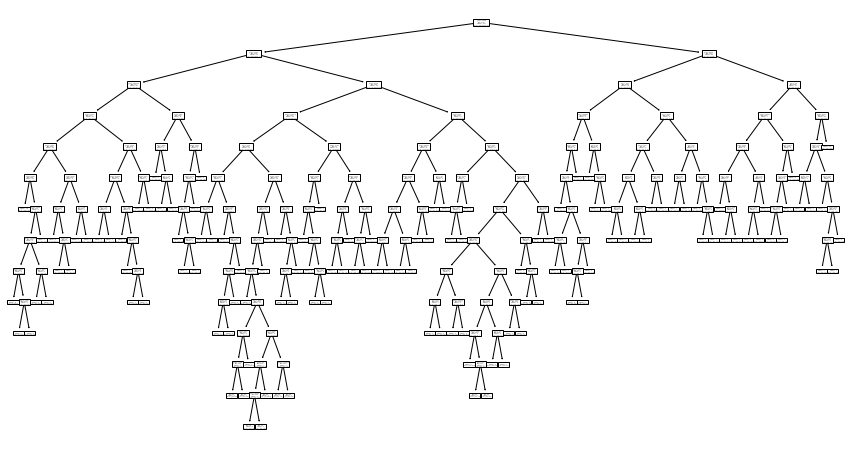

In [216]:
plt.figure(figsize=(15,8))
tree.plot_tree(dtree_model) 
plt.show()